In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from ast import literal_eval

from scipy.stats import bootstrap
import numpy as np

In [3]:
selected_topics_df = pd.read_csv(
    '../out_files/selected_topics_shift_per_period_compass_50iterations.csv',
    converters={'period_pair': literal_eval})
selected_topics_df

,iteration,period_pair,word,semantic_similarity,common_voc_size,neighbors_t1,neighbors_t2
0,0,"(12, 13)",συλλογικη,0.858836,80563,"[('κλαδικη', 0.7225825786590576), ('ατομικη', ...","[('κλαδικη', 0.6316236257553101), ('ατομικη', ..."
1,0,"(11, 12)",φορολογικα,0.882089,80924,"[('προσθετα', 0.6532301902770996), ('τελωνειακ...","[('προσθετα', 0.6811063289642334), ('βαρη', 0...."
2,0,"(10, 11)",εθνικη,0.956287,86396,"[('παλλαικη', 0.4205504059791565), ('ελληνικη'...","[('πολυμελης', 0.5375679135322571), ('παλλαικη..."
3,0,"(8, 9)",αμυνα,0.882250,63542,"[('ασφαλεια', 0.6846429109573364), ('ακεραιοτη...","[('ακεραιοτητα', 0.6850458979606628), ('ασφαλε..."
4,0,"(11, 12)",συλλογικη,0.882529,80924,"[('ατομικη', 0.5900278091430664), ('κλαδικη', ...","[('κλαδικη', 0.6964172124862671), ('αποικιοκρα..."
...,...,...,...,...,...,...,...
48245,49,"(13, 15)",ανωτατη,0.873688,83188,"[('τριτοβαθμια', 0.7540215253829956), ('διαπολ...","[('τριτοβαθμια', 0.7569918632507324), ('μειονο..."
48246,49,"(12, 13)",αμυνα,0.873383,80563,"[('ομοψυχια', 0.5617215633392334), ('πινακοθηκ...","[('ομοψυχια', 0.5596197843551636), ('ακεραιοτη..."
48247,49,"(7, 8)",τουριστικης,0.873335,68800,"[('βιομηχανικης', 0.6592989563941956), ('οικισ...","[('ολοκληρωμενης', 0.7599883675575256), ('οικι..."
48248,49,"(7, 8)",επιδοματων,0.877304,68800,"[('επιδοματος', 0.8182019591331482), ('βοηθημα...","[('επιδοματος', 0.766563892364502), ('αποδοχων..."


In [4]:
def confidence_intervals(data):
    res = bootstrap((data,), np.mean, confidence_level=0.95)
    return (res.confidence_interval.low, res.confidence_interval.high)

In [5]:
selected_topics_df = selected_topics_df[['period_pair', 'word', 'semantic_similarity']].\
    groupby(['period_pair', 'word']).agg(['mean', confidence_intervals]).reset_index()
selected_topics_df.sort_values(by='period_pair', inplace=True)
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                               
                         confidence_intervals  
0     (0.872741916844466, 0.8760387655834607)  
75   (0.8210667631390766, 0.8271954712979136)  
74   (0.8195840440714548, 0.8251599092482658)  
73   (0.8863764835437472, 0.8893212735488274)  
72   (0.8197058906446664, 0.8252374673692144)  
..                                        ...  
884  (0.7622745451787745, 0.7685987488867907)  
883   (0.862546245895781, 0.8661651268223454)  
882  (0.9011212079557002, 0.9043029922227696)  
908  (0.6419537291331011, 0.6611813887379375)  
964   (0.8465948074589564, 0.850632953119374)  

[965 rows x 4 columns]

In [6]:
selected_topics_df[['ci_low', 'ci_high']] = pd.DataFrame(selected_topics_df[('semantic_similarity', 'confidence_intervals')].tolist(), 
                                                         index= selected_topics_df.index)
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                                 ci_low   ci_high  
                         confidence_intervals                      
0     (0.872741916844466, 0.8760387655834607)  0.872742  0.876039  
75   (0.8210667631390766, 0.8271954712979136)  0.821067  0.827195  
74   (0.8195840440714548, 0.8251599092482658)  0.819584  0.825160  
73   (0.8863764835437472, 0.8893212735488274)  0.886376  0.889321  
72   (0.8197058906446664, 0.8252374673692144)  0.819706  0.825237  
..                                        ...       ...       ...  
884  (0.7622745451787745, 0.7685987488867907)  0.762275  0.768599  
883   (0.862546245895781, 0.8661651268223454)  0.862546  0.866165  
882  (0.9011212079557002, 0.9043029922227696)  0.901121  0.904303  
908  (0.6419537291331011, 0.6611813887379375)  0.641954  0.661181  
964   (0.8465948074589564, 0.850632953119374)  0.846595  0.850633  

[965 rows x 6 columns]

In [7]:
selected_topics_df['yerr_low'] = (selected_topics_df[('semantic_similarity', 'mean')] 
                                  - selected_topics_df['ci_low'])
selected_topics_df['yerr_high'] = (selected_topics_df['ci_high'] 
                                   - selected_topics_df[('semantic_similarity', 'mean')])
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                                 ci_low   ci_high  yerr_low  \
                         confidence_intervals                                 
0     (0.872741916844466, 0.8760387655834607)  0.872742  0.876039  0.001583   
75   (0.8210667631390766, 0.8271954712979136)  0.821067  0.827195  0.003142   
74   (0.8195840440714548, 0.8251599092482658)  0.819584  0.825160  0.002766   
73   (0.8863764835437472, 0.8893212735488274)  0.886376  0.889321  0.001433   
72   (0.8197058906446664, 0.8252374673692144)  0.819706  0.825237  0.002670   
..                                        ...       ...       ...       ...   
884  (0.7622745451787745, 0.7685987488867907)  0.762275  0.768599  0.003227   
883   (0.862546245895781, 0.8661651268223454)  0.862546  0.866165  0.001826   
882  (0.9011212079557002, 0.9043029922227696)  0.901121  0.904303  0.001618   
908  (0.6419537291331011, 0.6611813887379375)  0.641954  0.661181  0.010259   
964   (0.8465948074589564, 0.850632953119374)  0.846595  0.850633  0.002135   

    yerr_high  
               
0    0.001714  
75   0.002987  
74   0.002810  
73   0.001512  
72   0.002862  
..        ...  
884  0.003098  
883  0.001793  
882  0.001564  
908  0.008969  
964  0.001904  

[965 rows x 8 columns]

In [8]:
periods = {
    7: (1989, 1993),
    8: (1993, 1996),
    9: (1996, 2000),
    10: (2000, 2004),
    11: (2004, 2007),
    12: (2007, 2009),
    13: (2009, 2012),
    14: (2012, 2012),
    15: (2012, 2014),
    16: (2015, 2015),
    17: (2015, 2019),
    18: (2019, 2020)
}

In [9]:
selected_topics_df['period_start'] = selected_topics_df['period_pair'].map(lambda x: periods[x[0]][0])
selected_topics_df['period_end'] = selected_topics_df['period_pair'].map(lambda x: periods[x[1]][1])
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                                 ci_low   ci_high  yerr_low  \
                         confidence_intervals                                 
0     (0.872741916844466, 0.8760387655834607)  0.872742  0.876039  0.001583   
75   (0.8210667631390766, 0.8271954712979136)  0.821067  0.827195  0.003142   
74   (0.8195840440714548, 0.8251599092482658)  0.819584  0.825160  0.002766   
73   (0.8863764835437472, 0.8893212735488274)  0.886376  0.889321  0.001433   
72   (0.8197058906446664, 0.8252374673692144)  0.819706  0.825237  0.002670   
..                                        ...       ...       ...       ...   
884  (0.7622745451787745, 0.7685987488867907)  0.762275  0.768599  0.003227   
883   (0.862546245895781, 0.8661651268223454)  0.862546  0.866165  0.001826   
882  (0.9011212079557002, 0.9043029922227696)  0.901121  0.904303  0.001618   
908  (0.6419537291331011, 0.6611813887379375)  0.641954  0.661181  0.010259   
964   (0.8465948074589564, 0.850632953119374)  0.846595  0.850633  0.002135   

    yerr_high period_start period_end  
                                       
0    0.001714         1989       1996  
75   0.002987         1989       1996  
74   0.002810         1989       1996  
73   0.001512         1989       1996  
72   0.002862         1989       1996  
..        ...          ...        ...  
884  0.003098         2015       2020  
883  0.001793         2015       2020  
882  0.001564         2015       2020  
908  0.008969         2015       2020  
964  0.001904         2015       2020  

[965 rows x 10 columns]

In [10]:
selected_topics_df['period_middle'] = ((selected_topics_df['period_start'] 
                                        + selected_topics_df['period_end']) / 2)
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                                 ci_low   ci_high  yerr_low  \
                         confidence_intervals                                 
0     (0.872741916844466, 0.8760387655834607)  0.872742  0.876039  0.001583   
75   (0.8210667631390766, 0.8271954712979136)  0.821067  0.827195  0.003142   
74   (0.8195840440714548, 0.8251599092482658)  0.819584  0.825160  0.002766   
73   (0.8863764835437472, 0.8893212735488274)  0.886376  0.889321  0.001433   
72   (0.8197058906446664, 0.8252374673692144)  0.819706  0.825237  0.002670   
..                                        ...       ...       ...       ...   
884  (0.7622745451787745, 0.7685987488867907)  0.762275  0.768599  0.003227   
883   (0.862546245895781, 0.8661651268223454)  0.862546  0.866165  0.001826   
882  (0.9011212079557002, 0.9043029922227696)  0.901121  0.904303  0.001618   
908  (0.6419537291331011, 0.6611813887379375)  0.641954  0.661181  0.010259   
964   (0.8465948074589564, 0.850632953119374)  0.846595  0.850633  0.002135   

    yerr_high period_start period_end period_middle  
                                                     
0    0.001714         1989       1996        1992.5  
75   0.002987         1989       1996        1992.5  
74   0.002810         1989       1996        1992.5  
73   0.001512         1989       1996        1992.5  
72   0.002862         1989       1996        1992.5  
..        ...          ...        ...           ...  
884  0.003098         2015       2020        2017.5  
883  0.001793         2015       2020        2017.5  
882  0.001564         2015       2020        2017.5  
908  0.008969         2015       2020        2017.5  
964  0.001904         2015       2020        2017.5  

[965 rows x 11 columns]

In [26]:
selected_topics_df[selected_topics_df['word'] == 'brain']

period_pair   word semantic_similarity  \
                                      mean   
522    (12, 13)  brain            0.703587   
632    (13, 15)  brain            0.702042   
743    (15, 17)  brain            0.886206   
854    (17, 18)  brain            0.946961   

                                                 ci_low   ci_high  yerr_low  \
                         confidence_intervals                                 
522   (0.692749366242363, 0.7136815157948977)  0.692749  0.713682  0.010837   
632  (0.6950715929662825, 0.7087539427620407)  0.695072  0.708754  0.006970   
743  (0.8839031796396646, 0.8884589001864014)  0.883903  0.888459  0.002303   
854  (0.9460366352122891, 0.9478433109181351)  0.946037  0.947843  0.000925   

    yerr_high period_start period_end period_middle  
                                                     
522  0.010095         2007       2012        2009.5  
632  0.006712         2009       2014        2011.5  
743  0.002253         2012       2019        2015.5  
854  0.000882         2015       2020        2017.5

In [30]:
word_period_df = selected_topics_df.groupby(['word', 'period_pair']).agg('first')
word_period_df

semantic_similarity  \
                                 mean   
word  period_pair                       
brain (12, 13)               0.703587   
      (13, 15)               0.702042   
      (15, 17)               0.886206   
      (17, 18)               0.946961   
drain (12, 13)               0.729124   
...                               ...   
φπα   (11, 12)               0.840230   
      (12, 13)               0.814251   
      (13, 15)               0.912290   
      (15, 17)               0.855084   
      (17, 18)               0.848729   

                                                               ci_low  \
                                       confidence_intervals             
word  period_pair                                                       
brain (12, 13)      (0.692749366242363, 0.7136815157948977)  0.692749   
      (13, 15)     (0.6950715929662825, 0.7087539427620407)  0.695072   
      (15, 17)     (0.8839031796396646, 0.8884589001864014)  0.883903   
      (17, 18)     (0.9460366352122891, 0.9478433109181351)  0.946037   
drain (12, 13)     (0.7182523051008018, 0.7391236757233022)  0.718252   
...                                                     ...       ...   
φπα   (11, 12)     (0.8376982114936037, 0.8423469136825035)  0.837698   
      (12, 13)      (0.812212651311491, 0.8163921788883934)  0.812213   
      (13, 15)     (0.9112061899327736, 0.9132552978693049)  0.911206   
      (15, 17)     (0.8533075726555672, 0.8567115132233993)  0.853308   
      (17, 18)      (0.8465948074589564, 0.850632953119374)  0.846595   

                    ci_high  yerr_low yerr_high period_start period_end  \
                                                                          
word  period_pair                                                         
brain (12, 13)     0.713682  0.010837  0.010095         2007       2012   
      (13, 15)     0.708754  0.006970  0.006712         2009       2014   
      (15, 17)     0.888459  0.002303  0.002253         2012       2019   
      (17, 18)     0.947843  0.000925  0.000882         2015       2020   
drain (12, 13)     0.739124  0.010872  0.010000         2007       2012   
...                     ...       ...       ...          ...        ...   
φπα   (11, 12)     0.842347  0.002532  0.002117         2004       2009   
      (12, 13)     0.816392  0.002038  0.002141         2007       2012   
      (13, 15)     0.913255  0.001083  0.000966         2009       2014   
      (15, 17)     0.856712  0.001777  0.001627         2012       2019   
      (17, 18)     0.850633  0.002135  0.001904         2015       2020   

                  period_middle  
                                 
word  period_pair                
brain (12, 13)           2009.5  
      (13, 15)           2011.5  
      (15, 17)           2015.5  
      (17, 18)           2017.5  
drain (12, 13)           2009.5  
...                         ...  
φπα   (11, 12)           2006.5  
      (12, 13)           2009.5  
      (13, 15)           2011.5  
      (15, 17)           2015.5  
      (17, 18)           2017.5  

[965 rows x 9 columns]

In [50]:
topics_to_show = word_period_df[word_period_df[('semantic_similarity', 'mean')] < 0.6].\
    reset_index()['word'].unique()

array(['αθλητισμος', 'ανδρα', 'ανδρας', 'αντρα', 'αντρας', 'ασυλο',
       'ασυλου', 'ημιαπασχοληση', 'θρησκεια', 'θρησκευτικο',
       'θρησκευτικων', 'κοκ', 'μακεδονικο', 'ομοφυλοφιλοι', 'οσε',
       'προσφυγικο', 'προσχολικη', 'υδροδοτηση', 'υιοθεσια', 'υιοθεσιας'],
      dtype=object)

In [62]:
topics_to_skip = set([
    'ανδρα', 'αντρα', 'αντρας',
    'ασυλου',
    'θρησκευτικο',
    'θρησκευτικων',
    'κοκ',
    'οσε',
    'υιοθεσιας'
])

topics_to_show = [ t for t in topics_to_show if t not in topics_to_skip]
topics_to_show

['ασυλο',
 'μακεδονικο',
 'ημιαπασχοληση',
 'αθλητισμος',
 'ομοφυλοφιλοι',
 'προσφυγικο',
 'θρησκεια',
 'ανδρας',
 'υδροδοτηση',
 'προσχολικη',
 'υιοθεσια']

In [63]:
period_combos = {
    7: (5, 6, 7),
    8: (8,),
    9: (9,),
    10: (10,),
    11: (11,),
    12: (12,),
    13: (13,),
    14: (14, 15),
    15: (14, 15),
    16: (16, 17),
    17: (16, 17),
    18: (18,)
}

In [64]:
def period_ticklabel(period_pair):
    start, end = period_pair
    start_str = '-'.join([str(x) for x in period_combos[start]])
    end_str = '-'.join([str(x) for x in period_combos[end]])
    return f'{start_str} ({periods[start][0]}-{periods[start][1]}) &\n {end_str} ({periods[end][0]}-{periods[end][1]})'

period_ticklabel((7, 8))

'5-6-7 (1989-1993) &\n 8 (1993-1996)'

In [65]:
topics = [
    'αγροτικη', 'αγροτικα', 'αγροτες', 
    'αναπτυξη', 'επενδυσεις', 'επενδυσεων',
    'ασφαλιστικο', 'εργασια', 'εργασιακα', 
    'δικαιωματα', 'συμβαση', 'συλλογικη', 
    'μισθος', 'βασικος', 'ημιαπασχοληση', 
    'brain', 'drain', 'οαεδ',
    'δικαιοσυνη', 'διαφανεια', 'υιοθεσια', 
    'υιοθεσιας', 'εθνικη', 'αμυνα', 
    'ενοπλες', 'εξωτερικη', 'διεθνεις',
    'ναυτιλια','νησια','υδροδοτηση',
    'αλιεια', 'οικονομια', 'αφορολογητο', 
    'αποκεντρωση', 'φπα', 'επιχειρησεις', 
    'φορολογικα', 'φορολογια', 'παιδεια', 
    'ερευνα', 'προσχολικη', 'ασυλο', 
    'ασυλου', 'πανεπιστημιακο', 'δευτεροβαθμια', 
    'πρωτοβαθμια', 'ανωτατη', 'δημοσια', 
    'ιδιωτικη', 'σχολες', 'περιβαλλον', 
    'ενεργεια', 'συστημα', 'πολιτισμος', 
    'αθλητισμος', 'πολιτισμο', 'αθλητισμου', 
    'προστασια', 'αστυνομια', 'κοκ', 
    'αστυνομικη', 'αστυνομικοι', 'αστυνομικων',
    'προσφυγικο', 'μεταναστευτικο', 'προσφυγες', 
    'μεταναστες', 'τουρισμος', 'τουριστικης', 
    'τουρισμου', 'τουρισμο', 'υγεια', 
    'προνοια', 'επιδοματα', 'επιδομα', 
    'επιδοματων', 'υποδομες', 'μεταφορες', 
    'αναπλαση', 'μμμ', 'μειωση', 
    'αυξηση', 'συνταξη', 'μακεδονικο', 
    'μακεδονιας', 'μακεδονια', 'προσληψεις', 
    'απολυσεις', 'εκας', 'οσε', 
    'συγκοινωνιες', 'νομοσχεδιο', 'θρησκεια', 
    'θρησκειας', 'θρησκευτικο', 'θρησκευτικου',
    'θρησκευτικων', 'γυναικα', 'γυναικας', 
    'ανδρας',  'ανδρα', 'αντρας', 
    'αντρα', 'ομοφυλα', 'ομοφυλοφιλοι', 
    'ομοφιλοφιλων', 'εοπυυ', 'τουρκια', 
    'τουρκιας', 'εκκλησιας', 'εκκλησια', 
    'κριση', 'κρισης', 'αυθαιρεσια'
]

In [66]:
topics = {
    'αγροτικη': 'agricultural', 'αγροτικα': 'agricultural', 'αγροτες': 'farmers',
    'αναπτυξη': 'growth', 'επενδυσεις': 'investements', 'επενδυσεων': 'investements',
    'ασφαλιστικο': 'insurance', 'εργασια': 'labor', 'εργασιακα': 'labor', 
    'δικαιωματα': 'rights', 'συμβαση': 'contract', 'συλλογικη': 'collective',
    'μισθος': 'salary', 'βασικος': 'minimum', 'ημιαπασχοληση': 'part-time', 
    'brain': 'brain', 'drain': 'drain', 'οαεδ': 'OAED',
    'δικαιοσυνη': 'justice', 'διαφανεια': 'transparency', 'υιοθεσια': 'adoption', 
    'υιοθεσιας': 'adoption', 'εθνικη': 'national', 'αμυνα': 'defence', 
    'ενοπλες': 'armed', 'εξωτερικη': 'foreign', 'διεθνεις': 'international',
    'ναυτιλια': 'shipping', 'νησια': 'islands', 'υδροδοτηση': 'water_supply', 
    'αλιεια': 'fishing', 'οικονομια': 'economy', 'αφορολογητο': 'tax-exempt',
    'αποκεντρωση': 'decentralization', 'φπα': 'VAT', 'επιχειρησεις': 'businesses', 
    'φορολογικα': 'tax', 'φορολογια': 'taxation', 'παιδεια': 'education', 
    'ερευνα': 'research', 'προσχολικη': 'preschool', 'ασυλο': 'asylum', 
    'ασυλου': 'asylum', 'πανεπιστημιακο': 'university', 'δευτεροβαθμια': 'secondary',
    'πρωτοβαθμια': 'primary', 'ανωτατη': 'higher', 'δημοσια': 'public', 
    'ιδιωτικη': 'private', 'σχολες': 'schools/faculties', 'περιβαλλον': 'environment', 
    'ενεργεια': 'energy', 'συστημα': 'system', 'πολιτισμος': 'culture', 
    'αθλητισμος': 'sports', 'πολιτισμο': 'culture', 'αθλητισμου': 'sports',
    'προστασια': 'protection', 'αστυνομια': 'police', 'κοκ': 'traffic_code', 
    'αστυνομικη': 'police', 'αστυνομικοι': 'police', 'αστυνομικων': 'police',
    'προσφυγικο': 'refugee', 'μεταναστευτικο': 'migratory', 'προσφυγες': 'refugees', 
    'μεταναστες': 'immigrants', 'τουρισμος': 'tourism', 'τουριστικης': 'tourism',
    'τουρισμου': 'tourism', 'τουρισμο': 'tourism', 'υγεια': 'heatlh', 
    'προνοια': 'welfare', 'επιδοματα': 'subsidies', 'επιδομα': 'subsidy', 
    'επιδοματων': 'subsidies', 'υποδομες': 'infrastructure', 'μεταφορες': 'transportation',
    'αναπλαση': 'remodeling', 'μμμ': 'public_transport ', 'μειωση': 'reduction', 
    'αυξηση': 'raise', 'συνταξη': 'retirement', 'μακεδονια': 'macedonia', 
    'μακεδονιας': 'macedonia', 'μακεδονικο': 'macedonian', 'προσληψεις': 'hirings',
    'απολυσεις': 'redundancies', 'εκας': 'EKAS', 'οσε': 'OSE',
    'συγκοινωνιες': 'transportation', 'νομοσχεδιο': 'bill', 'θρησκεια': 'religion', 
    'θρησκειας': 'religion', 'θρησκευτικο': 'religious', 'θρησκευτικου': 'religious',
    'θρησκευτικων': 'religious', 'γυναικα': 'woman', 'γυναικας': 'woman', 
    'ανδρας': 'man', 'αντρας': 'man', 'αντρα': 'man', 
    'ανδρα': 'man', 'ομοφυλα': 'same-sex', 'ομοφυλοφιλοι': 'homosexuals', 
    'ομοφιλοφιλων': 'homosexuals', 'εοπυυ': 'EOPPY', 'τουρκια': 'Turkey', 
    'τουρκιας': 'Turkey', 'εκκλησιας': 'church', 'εκκλησια': 'church', 
    'κριση': 'crisis', 'κρισης': 'crisis', 'αυθαιρεσια': 'arbitrariness'
}

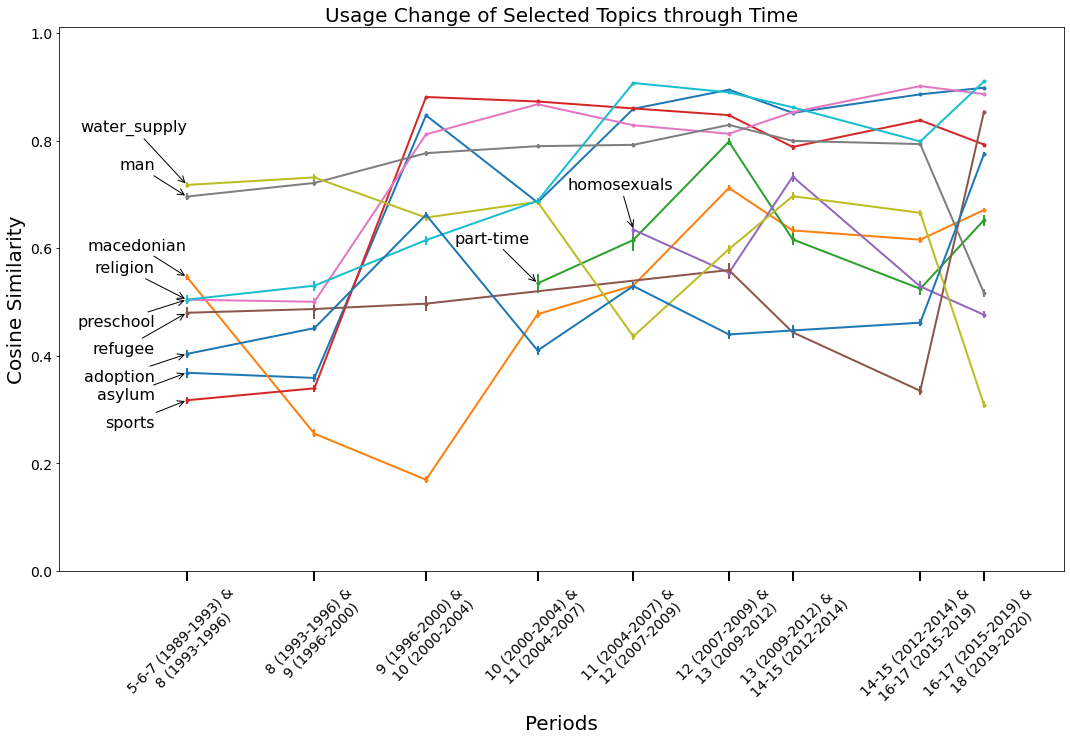

In [119]:
fig = plt.figure(figsize=(18, 10))


xytext_offsets = {
    'asylum': (-1, -0.05),
    'macedonian': (0, 0.05),
    'part-time': (-0.25, 0.075), 
    'sports': (-1, -0.05),
    'homosexuals': (1.25, 0.075),
    'refugee': (-1, -0.075),
    'religion': (-1, 0.05),
    'man': (-1, 0.05),
    'water_supply': (0, 0.1),
    'preschool': (-1, -0.05),
    'adoption': (-1, -0.05)
}

for ti, topic in enumerate(topics_to_show):
    selected_topic_df = selected_topics_df[selected_topics_df['word'] == topic]
    #print(selected_topic_df)
    yerr = [
        selected_topic_df['yerr_low'],
        selected_topic_df['yerr_high']
    ]
    
    average_similarity = selected_topic_df[('semantic_similarity', 'mean')]
    x = selected_topic_df['period_middle'].iloc[0]
    y = average_similarity.iloc[0]
    plt.errorbar(x=selected_topic_df['period_middle'], 
                 y=average_similarity, 
                 yerr=yerr, 
                 label=topic, 
                 linewidth=2, markersize=3, fmt='-o')
    plt.annotate(topics[topic], 
                 xy=(x, y), 
                 xytext=(x+xytext_offsets[topics[topic]][0], y+xytext_offsets[topics[topic]][1]),
                 fontsize=16,
                 ha='right',
                 arrowprops=dict(arrowstyle='->'))

plt.xlim((1988.5, 2020))
plt.ylim((0.0, 1.01))

xticks = selected_topic_df['period_middle'].unique()
xtick_labels = [ period_ticklabel(x) for x in sorted(selected_topic_df['period_pair'].unique()) ]
plt.xticks(xticks, xtick_labels, rotation=45, minor=False, fontsize=14)
plt.tick_params(axis='x', direction='out', which='major', length=10, width=2)
plt.yticks(fontsize=14)


plt.ylabel('Cosine Similarity', fontsize=20)
plt.xlabel('Periods', fontsize=20)
_ = plt.title('Usage Change of Selected Topics through Time', fontsize=20)
plt.savefig('../out_files/usage_change_of_selected_topics_through_time_with_errorbars.png', dpi=300,  
            bbox_inches='tight')